In [1]:
using OptimalControl

In [2]:
x0 = [ 0
       1 ]
A  = [ 0 1
      -1 0 ]
B  = [ 0
       1 ]

function LQRProblem(tf)

    @def ocp begin
        t ∈ [ 0, tf ], time
        x ∈ R², state
        u ∈ R, control
        x(0) == x0, initial_con
        ẋ(t) == A * x(t) + B * u(t)
        ∫( 0.5(x₁(t)^2 + x₂(t)^2 + u(t)^2) ) → min
    end

    return ocp
end;

In [6]:
solutions = []
tfspan = [3, 5, 30]
for tf ∈ tfspan
    sol = solve(LQRProblem(tf), display=false)
    push!(solutions, sol)
end

In [4]:
function rescale(sol)
    times = sol.times
    t(s)  = times[1] + s * (times[end] - times[1])
    sol.times   = (times .- times[1]) ./ (times[end] .- times[1])
    x = sol.state
    u = sol.control
    p = sol.costate
    sol.state   = x∘t
    sol.control = u∘t
    sol.costate = p∘t
    return sol
end;

rescale (generic function with 1 method)

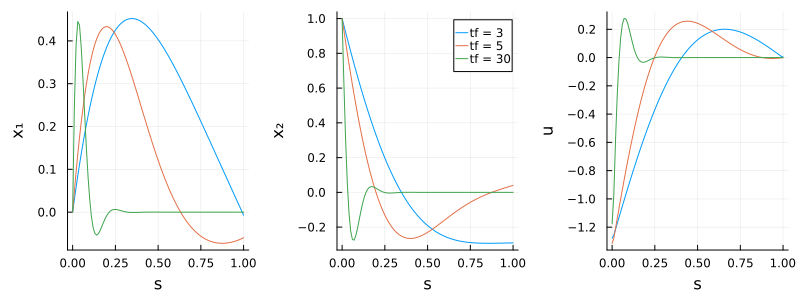

In [15]:
using Plots.PlotMeasures # for leftmargin, bottommargin

plt = plot(rescale(solutions[1]))
for sol in solutions[2:end]
    plot!(plt, rescale(sol))
end
px1 = plot(plt[1], legend=false, xlabel="s", ylabel="x₁")
px2 = plot(plt[2], label=reshape(["tf = $tf" for tf ∈ tfspan], (1, length(tfspan))), xlabel="s", ylabel="x₂")
pu  = plot(plt[5], legend=false, xlabel="s", ylabel="u")
plot(px1, px2, pu, layout=(1, 3), size=(800, 300), leftmargin=5mm, bottommargin=5mm)

In [18]:
x0 = [ 0
       1 ]
A  = [ 0 1
      -1 0 ]
B  = [ 0
       1 ]

function LQRProblemScaled(tf)

    @def ocp begin
        s ∈ [ 0, 1 ], time
        x ∈ R², state
        u ∈ R, control
        x(0) == x0, initial_con
        ẋ(s) == tf * ( A * x(s) + B * u(s) )
        ∫( 0.5(x₁(s)^2 + x₂(s)^2 + u(s)^2) ) → min
    end

    return ocp
end;

In [19]:
solutions = []
tfspan = [3, 5, 30]
for tf ∈ tfspan
    sol = solve(LQRProblemScaled(tf), display=false)
    push!(solutions, sol)
end

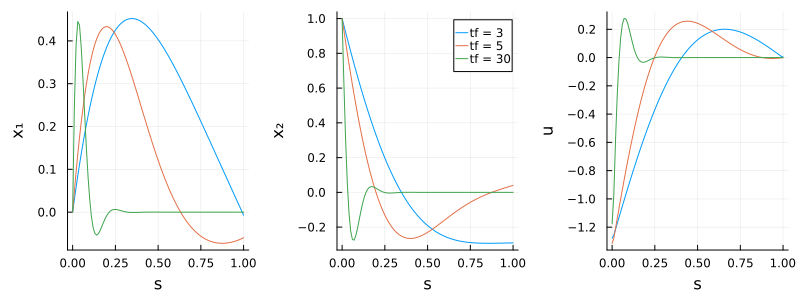

In [20]:
using Plots.PlotMeasures # for leftmargin, bottommargin

plt = plot(solutions[1])
for sol in solutions[2:end]
    plot!(plt, sol)
end
px1 = plot(plt[1], legend=false, xlabel="s", ylabel="x₁")
px2 = plot(plt[2], label=reshape(["tf = $tf" for tf ∈ tfspan], (1, length(tfspan))), xlabel="s", ylabel="x₂")
pu  = plot(plt[5], legend=false, xlabel="s", ylabel="u")
plot(px1, px2, pu, layout=(1, 3), size=(800, 300), leftmargin=5mm, bottommargin=5mm)